In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


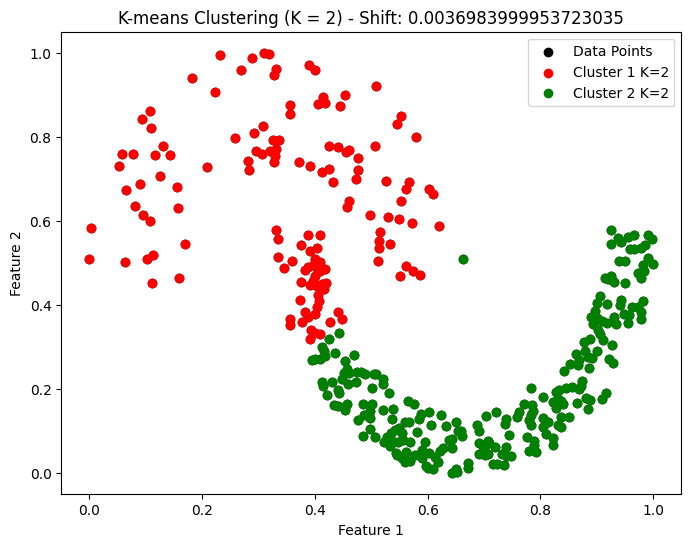

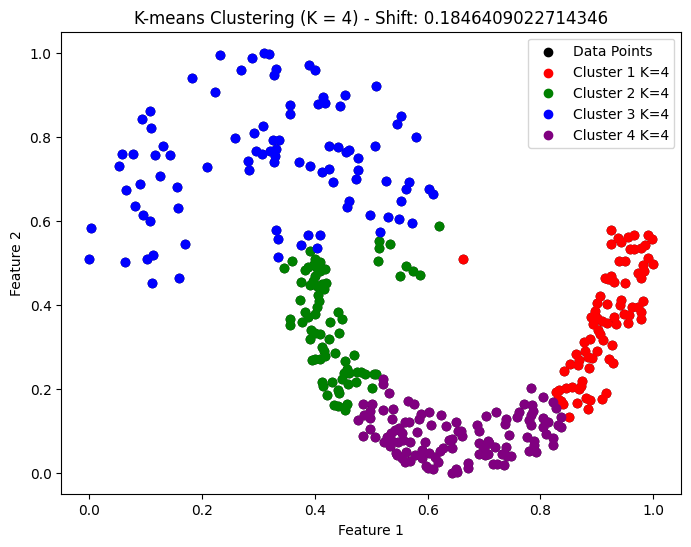

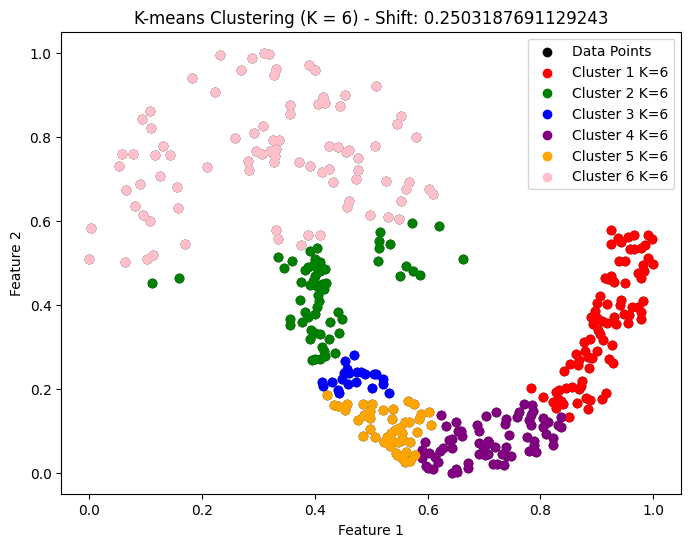

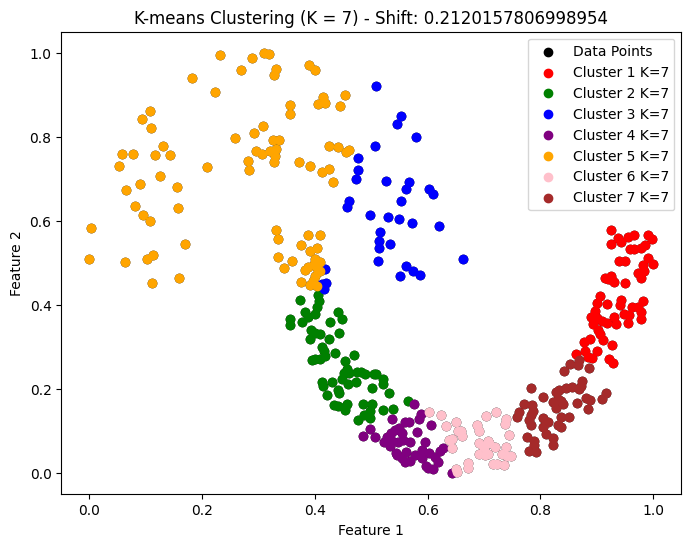

Inertia and Shift Values:
K = 2: Inertia = 20.57393155309561, Shift = 0.0036983999953723035
K = 4: Inertia = 8.733473022248349, Shift = 0.1846409022714346
K = 6: Inertia = 7.055886428983577, Shift = 0.2503187691129243
K = 7: Inertia = 6.162903851515341, Shift = 0.2120157806998954


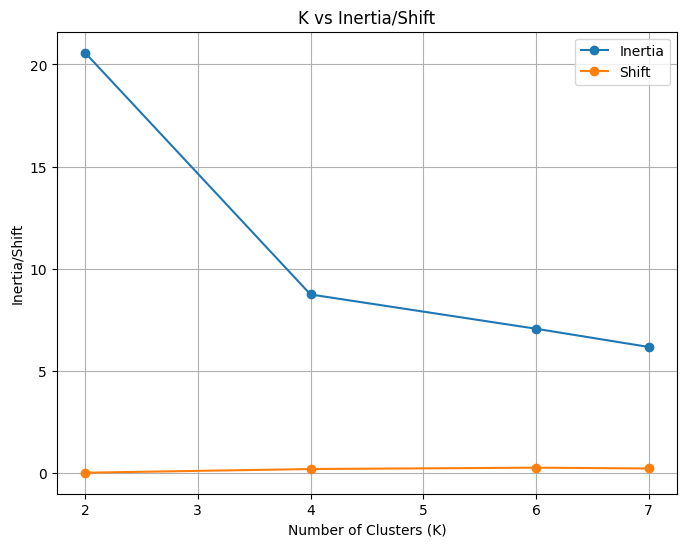

In [2]:
import matplotlib.pyplot as plt
import random

random.seed(11161245)

data_file = "/content/drive/MyDrive/AI assignment/Assignment4/jain_feats.txt"
data = []
with open(data_file, 'r') as file:
    for line in file:
        x, y = map(float, line.strip().split())
        data.append([x, y])

def euclidean_distance(p1, p2):
    return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5

def assign_points_to_clusters(data, centers):
    clusters = [[] for _ in range(len(centers))]
    for point in data:
        distances = [euclidean_distance(point, center) for center in centers]
        closest_center_idx = distances.index(min(distances))
        clusters[closest_center_idx].append(point)
    return clusters

def update_centers(clusters):
    return [[sum(coord) / len(cluster) for coord in zip(*cluster)] for cluster in clusters]

def k_means(data, k, max_iters=100, tol=1e-4):
    initial_centers = random.sample(data, k)
    centers = initial_centers

    # Initialize shift variable
    shift = 0

    for itr in range(1, max_iters + 1):
        old_centers = [center[:] for center in centers]
        clusters = assign_points_to_clusters(data, centers)
        centers = update_centers(clusters)

        # Calculate shift
        shift = sum(
            euclidean_distance(old_centers[i], centers[i])
            for i in range(k)
        )

        # Break if convergence
        if itr > 1 and shift < 50:
            break

    inertia = 0
    for i, cluster in enumerate(clusters):
        cluster_center = centers[i]
        inertia += sum(euclidean_distance(point, cluster_center) ** 2 for point in cluster)

    return centers, clusters, inertia, shift

k_values = [2, 4, 6, 7]
inertia_values = []
shift_values = []  # New list to store shift values
colors = ['red', 'green', 'blue', 'purple', 'orange', 'pink', 'brown']

for k in k_values:
    plt.figure(figsize=(8, 6))
    plt.scatter([point[0] for point in data], [point[1] for point in data], color='black', label='Data Points')

    centers, clusters, inertia, shift = k_means(data, k)
    inertia_values.append(inertia)
    shift_values.append(shift)

    for i, cluster in enumerate(clusters):
        plt.scatter([point[0] for point in cluster], [point[1] for point in cluster], color=colors[i], label=f'Cluster {i+1} K={k}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-means Clustering (K = {k}) - Shift: {shift}')
    plt.legend()
    plt.show()

# Print inertia and shift values for different K values
print("Inertia and Shift Values:")
for k, inertia, shift in zip(k_values, inertia_values, shift_values):
    print(f"K = {k}: Inertia = {inertia}, Shift = {shift}")

# Plot the graph of K vs Inertia
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', label='Inertia')
plt.plot(k_values, shift_values, marker='o', label='Shift')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia/Shift')
plt.title('K vs Inertia/Shift')
plt.legend()
plt.grid(True)
plt.show()
